In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(200, 2, centers=2, cluster_std=1.5, random_state=0)
X += 100 # X = X + 100

In [5]:
X.shape, np.unique(y)

((200, 2), array([0, 1]))

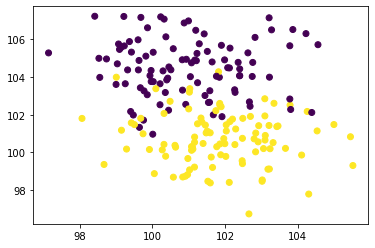

In [7]:
plt.scatter( X[:,0] , X[:,1], c=y )

In [8]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

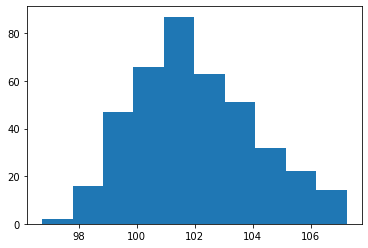

In [13]:
plt.hist(X.flatten());
#plt.show()

In [16]:
pd.DataFrame(X).corr()

0         1
0  1.000000 -0.266379
1 -0.266379  1.000000

In [18]:
model = GaussianNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test) ) )

0.86


0   1
0  21   6
1   1  22

In [20]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test) ) )

0.86


0   1
0  22   5
1   2  21

In [21]:
model = BernoulliNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test) ) )

0.46


0   1
0  0  27
1  0  23

In [22]:
model = MultinomialNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test) ) )

0.66


0   1
0  10  17
1   0  23

### Klasyfikacja tekstu za pomocą klasyfikatora Bayes'a

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
sentences = ["Julia kocha Marka", "Marek kocha Annę", "Anna i Julia kochają Marka"]

In [25]:
cv = CountVectorizer()

In [26]:
# wektoryzacja tesktu i budowanie words-matrix
wm = cv.fit_transform(sentences)
wm

<3x7 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [28]:
cv.get_feature_names_out()

array(['anna', 'annę', 'julia', 'kocha', 'kochają', 'marek', 'marka'],
      dtype=object)

In [31]:
pd.DataFrame( wm.toarray(), columns=cv.get_feature_names_out() )

anna  annę  julia  kocha  kochają  marek  marka
0     0     0      1      1        0      0      1
1     0     1      0      1        0      1      0
2     1     0      1      0        1      0      1

### Klasyfikator SPAM/HAM

In [36]:
pd.set_option("max_colwidth", None)

df = pd.read_csv("http://51.91.120.89/extras/SMSSpamCollection.csv", 
                 sep="\t", header=None, names=["label","text"])
df

label  \
0      ham   
1      ham   
2     spam   
3      ham   
4      ham   
...    ...   
5567  spam   
5568   ham   
5569   ham   
5570   ham   
5571   ham   

                                                                                                                                                                  text  
0                                                      Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...  
1                                                                                                                                        Ok lar... Joking wif u oni...  
2          Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's  
3                                                                                                                    U dun say so early hor... U c already then say...  
4                                                                                                        Nah I don't think he goes to usf, he lives around here though  
...                                                                                                                                                                ...  
5567  This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.  
5568                                                                                                                              Will ü b going to esplanade fr home?  
5569                                                                                                         Pity, * was in mood for that. So...any other suggestions?  
5570                                     The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free  
5571                                                                                                                                        Rofl. Its true to its name  

[5572 rows x 2 columns]

In [37]:
df.label.unique()

array(['ham', 'spam'], dtype=object)

In [39]:
df.label = df.label.map({ "ham":0, "spam":1 })
df.head(3)

label  \
0      0   
1      0   
2      1   

                                                                                                                                                          text  
0                                              Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...  
1                                                                                                                                Ok lar... Joking wif u oni...  
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

In [40]:
# M...k - maska dla "Marek"
# [Mm]...k - maska dla "Marek", "marek"
# [0-9][0-9]-[0-9][0-9][0-9]
# [0-9]{2}-[0-9]{3} - kod pocztowy, "Warszawa 00-001"
# ^[0-9]{2}-[0-9]{3}$ - dokładnie zaczyna sie od i konczy na
# [0-9]{1,2} - liczba maks. 2-cyfrowa
# [0-9]{3,} - liczba z min. 3 cyframi
# [0-9] - tylko znaki od 0 do 9
# ^[0-9]$ - tylko znaki od 0 do 9 oraz dokładnie zaczyna sie od i konczy na
# [^0-9] - różne od zestawu znakow od 0 do 9
# [0-9A-Za-z_] to jest to samo co \w
# \s - spacje
# \d - cyfry

In [45]:
df.text = df.text.str.replace("[^\w\s]", "")

/var/folders/mt/w8p0p2hs3rxbr7vxjnt807t00000gn/T/ipykernel_11506/1338821350.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.text = df.text.str.replace("[^\w\s]", "")


In [46]:
df.sample(n=10, random_state=0)

label  \
4456      0   
690       1   
944       0   
3768      0   
1189      0   
4437      0   
3587      1   
1982      0   
2038      0   
2078      0   

                                                                                                                                                                                                                                                                                                text  
4456  Storming msg Wen u lift d phne u say HELLO Do u knw wt is d real meaning of HELLO    Its d name of a girl    Yes And u knw who is dat girl Margaret Hello She is d girlfrnd f Grahmbell who invnted telphone     MoralOne can 4get d name of a person bt not his girlfrnd G o o d n i g h t     
690                                                                                                                                                                                     Forwarded from 448712404000Please CALL 08712404000 immediately as there is an urgent message waiting for you  
944                                                                                                                                                                              And also Ive sorta blown him off a couple times recently so id rather not text him out of the blue looking for weed  
3768                                                                                                                                                                                                                                                               Sir Goodmorning Once free call me  
1189                                                                                                                                                                                                                          All will come alivebetter correct any good looking figure there itself  
4437                                                                                                                                        HouseMaid is the murderer coz the man was murdered on  ltgt th January As public holiday all govtinstituitions are closedincluding post officeunderstand  
3587                                                                                                                                       I am hot n horny and willing I live local to you  text a reply to hear strt back from me 150p per msg Netcollex LtdHelpDesk 02085076972 reply Stop to end  
1982                                                                                                                                                                                                               Sorry Ill call later in meeting any thing related to trade please call Arul ltgt   
2038                                                                                                                                                                                                                                                                        Oh sorry please its over  
2078                                                                                                                                                              Hey hunonbus goin 2 meet him He wants 2go out 4a meal but I donyt feel like it cuz have 2 get last bus homeBut hes sweet latelyxxx

In [47]:
cv = CountVectorizer()

In [ ]:
cv.transform